<a href="https://colab.research.google.com/github/TacticalCoders/NLP-with-Pytorch/blob/main/4_1_MLP_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **피드 포워드 신경망**

피드 포워드 신경망에는 두 가지 종류가 있다. 다층 퍼셉트론(multilayer perceptron, **MLP**)과 합성공 신경망(convolutional neural network, **CNN**)

**MLP**는 3장에서 배운 퍼셉트론을 구조적으로 확장한 신경망이다. (많은 퍼셉트론이 있는 층을 여러 개 쌓아 올린 구조.)

**CNN**은 디지털 신호 처리에 사용하는 윈도 필터에 영향을 받아 만든 신경망이다. 입력에 있는 국부 패턴을 학습할 수 있어 컴퓨터 비전에 적합하고 단어나 문장 같은 순차 데이터에서 부분 구조를 감지하는 데 이상적이다.

## 다층 퍼셉트론(MLP)

퍼셉트론은 입력으로 데이터 벡터를 받고 출력값 하나를 계산한다. MLP에는 많은 퍼셉트론이 모여 있어 층의 출력은 출력값 하나가 아닌 벡터(차원은 퍼셉트론의 수)이다. 

파이토치에서는 Linear 층에 **출력 특성의 개수를 저장**하여 간단하게 만들 수 있다. ex) model = nn.Linear(input_dim, 10)

MLP의 또 다른 특징은 층 사이에 비선형성(활성화 함수)를 추가한다는 점이다.

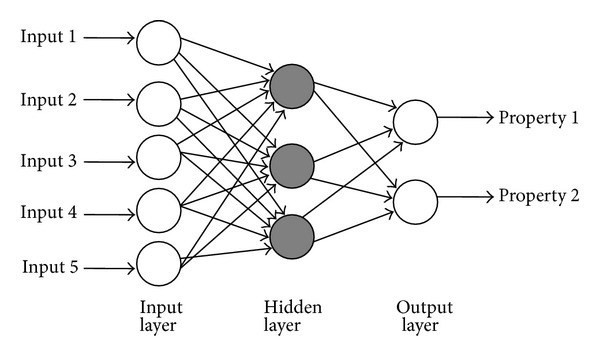

입력 벡터가 모델에 입력되면 첫 번째 Linear층(Hidden layer)이 은닉 벡터(hidden vector)를 계산한다. 은닉 벡터의 값은 층을 구성하는 각 퍼셉트론의 출력이다. 두 번째 Linear 층(Output layer)은 은닉 벡터를 사용해 출력 벡터(output vector)를 계산한다. 출력 벡터의 크기는 이진 분류에서는 1이고, 다중 분류에서는 클래스 수 이다.

그림에서는 은닉층이 하나지만 중간 단계는 여럿일 수 있다. 단계마다 각각의 은닉 벡터를 만든다. 최종 은닉 벡터는 **항상** Linear 층과 비선형 함수를 사용하여 출력 벡터에 매칭된다. 

이처럼 MLP의 강력한 성능은 두 번째 Linear 층을 추가하여 모델이 중간 표현을 학습할 수 있다는 데 있다. 이 중간 표현은 선형적으로 구분할 수 있다. 즉, 직선(or 초평면[다변수])으로 데이터 포인트가 어느 쪽에 놓여있는지 구별할 수 있다. 분류 작업에서 선형으로 구분하기 같은 중간 표현 학습은 모델링 능력의 정수이다.

## XOR 

별과 원을 구분하는 이진 분류 작업을 MLP로 훈련하면 아래 그림과 같이 별과 원은 구분하는 결정 경계를 정확하게 학습한다.

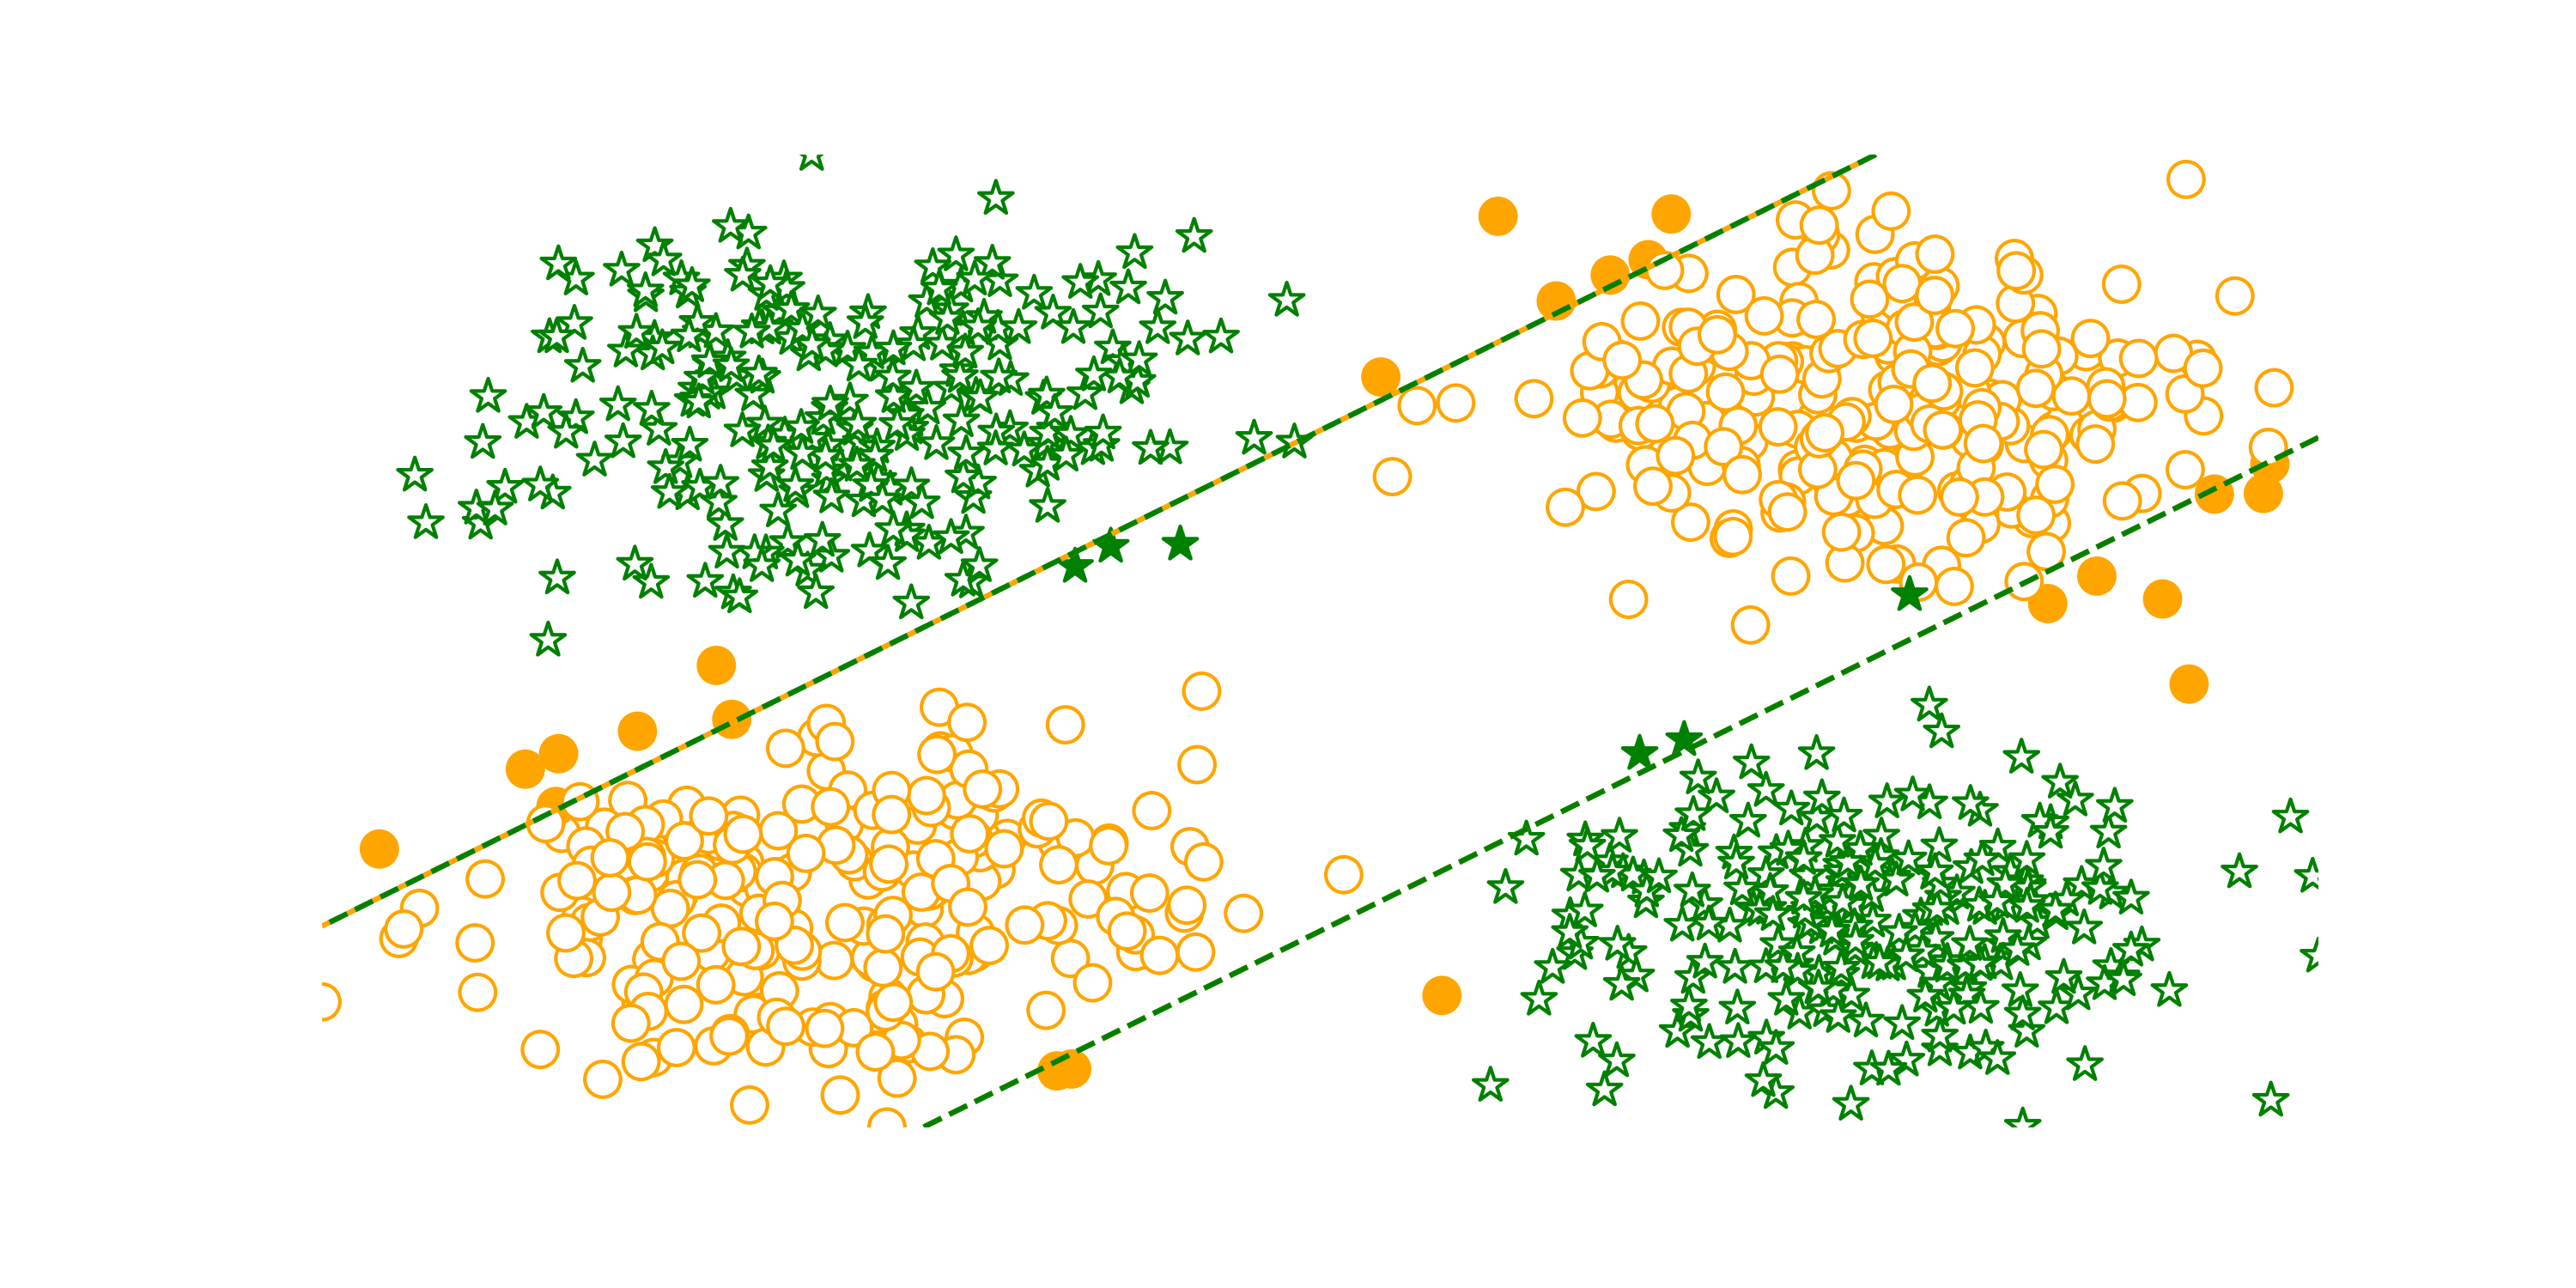

결정 경계가 두 개인 것으로 보이지만 사실 하나의 결정 경계이다. 중간 표현이 공간을 변형해 초평면 하나가 두 곳에 나타나도록 만들어져 두 개로 보이는 것이다. 


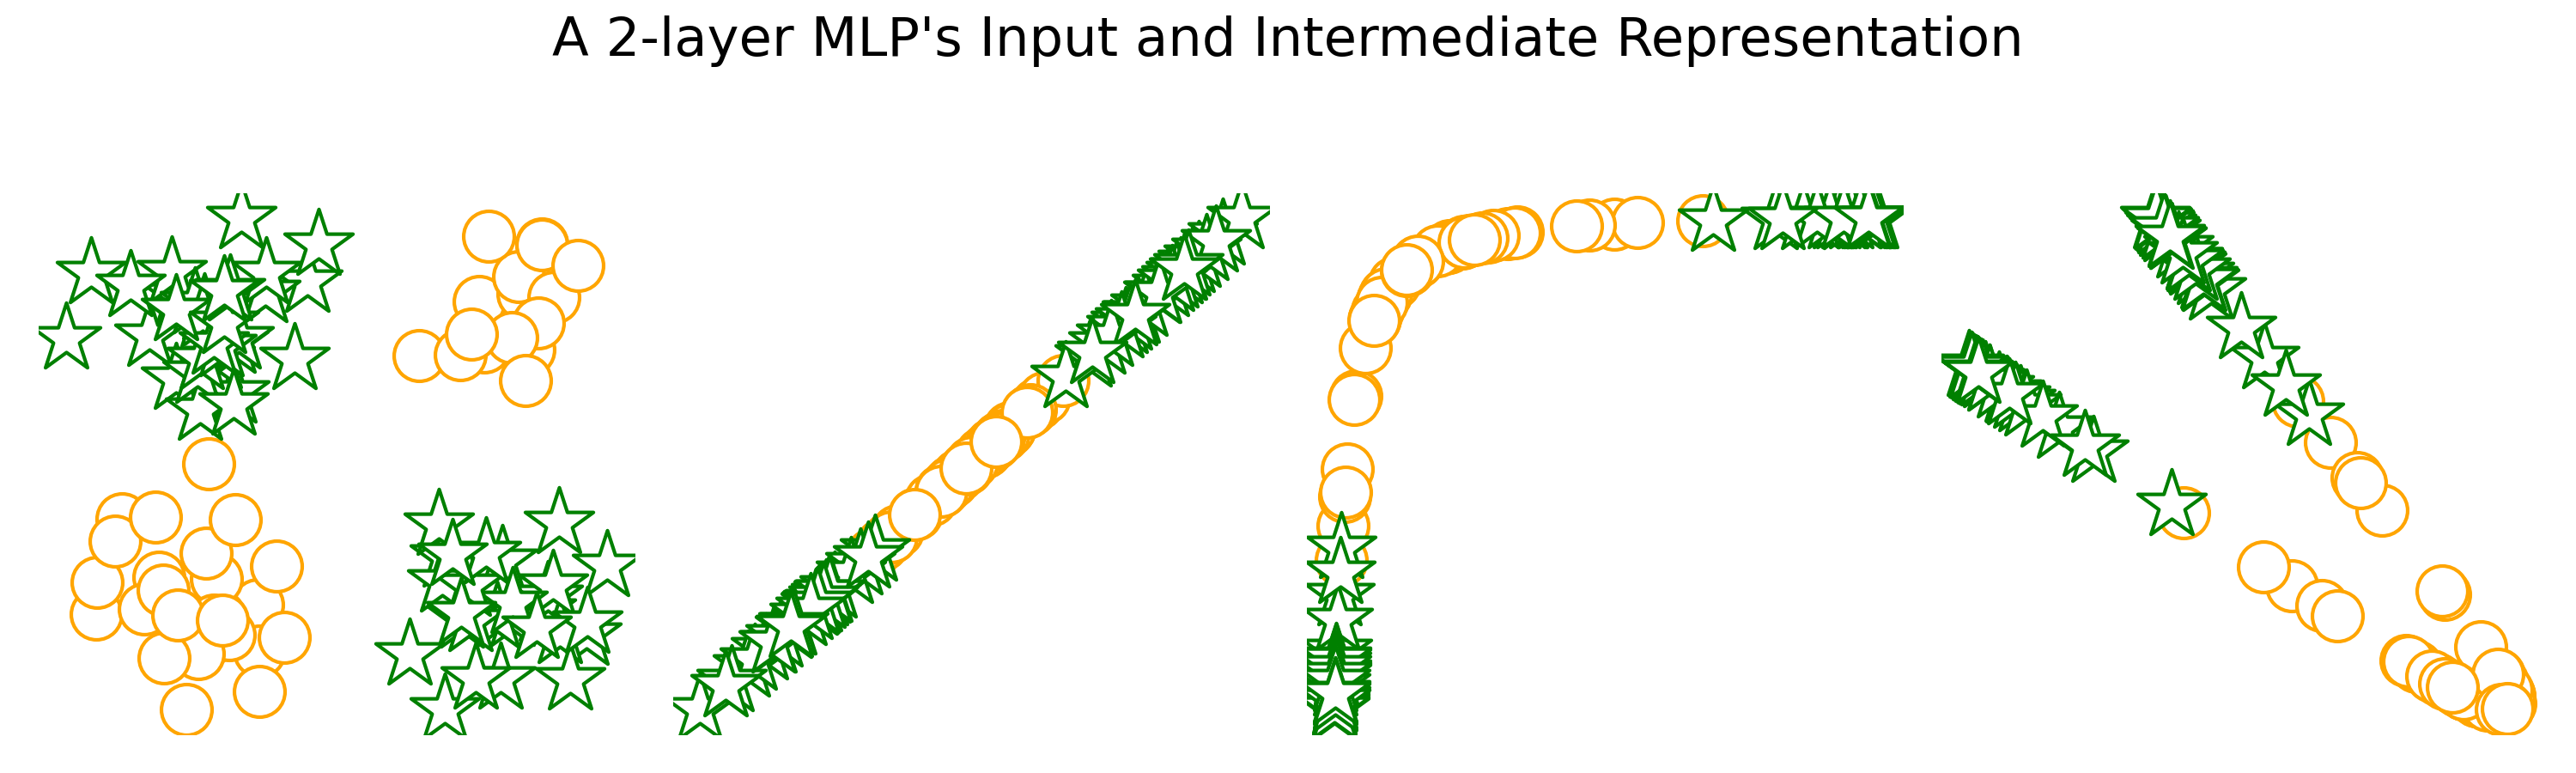

첫 번째 그림은 입력을 나타내고, 두 번째 그림은 첫 번째 층(은닉층)의 선형출력이다. 세 번째 그림은 첫 번째 층에 활성화 함수를 적용한 것이고 4번째 그림은 선형적으로 구분할 수 있도록 데이터 포인트를 재조직한다.

즉, 마지막 층을 통과할 때 직선 하나로 데이터셋을 나눌 수 있도록 신경망이 데이터 공간을 비트는 방법을 배운 것이다. 

### 파이토치로 XOR 판별 모델 만들어보기

하나의 선형층으로는 XOR 문제를 풀 수 없다. 이를 직접 확인해보자.

#### 단층 퍼셉트론

In [11]:
import torch
from torch import nn

In [12]:
# GPU 연산이 가능한 경우엔 GPU 연산 수행
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [13]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [14]:
# 단층 퍼셉트론 구현
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [15]:
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [16]:
#10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지.
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.7273974418640137
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

비용(손실)이 감소하지 않는다. 즉, 아무리 반복해도 성능이 좋아지지 않는다. 

**이는 단층 퍼셉트론이 XOR 문제를 풀 수 없기 때문이다.**

학습한 단층 퍼셉트론의 예측값을 확인해보자.

In [18]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


실제로는 0110을 예측해야 하는데 0000을 예측한 것을 확인할 수 있다.

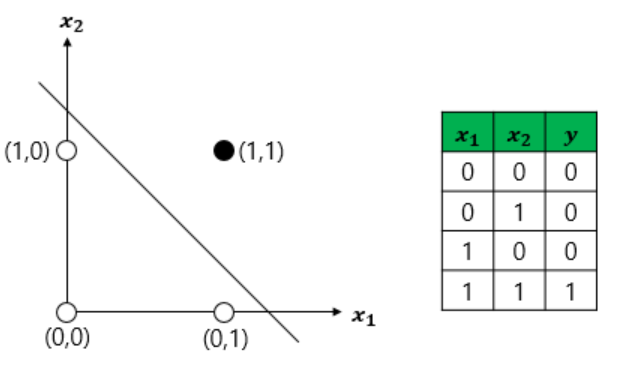

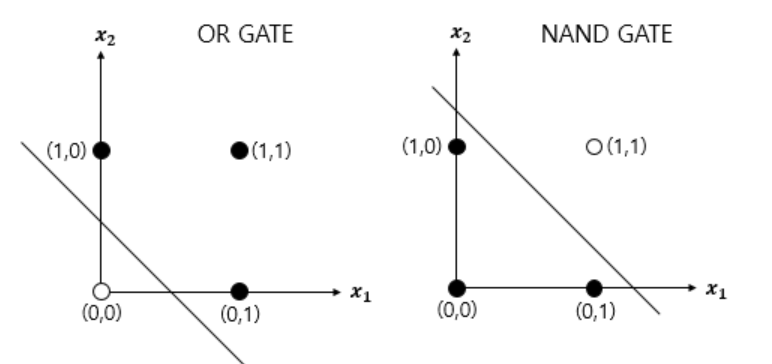

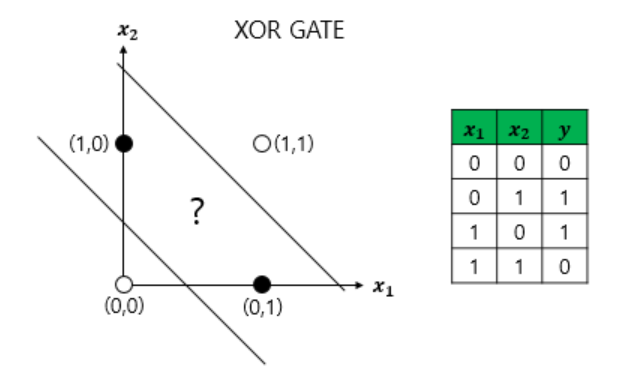

하나의 하나의 선형층을 학습한다는 것은 하나의 직선으로 구분 경계를 만들어 판단하겠다는 것인데, 위처럼 xor의 경우는 하나의 직선으로 판별할 수가 없다. 따라서 다음과 같이 곡선을 만들어야 한다.

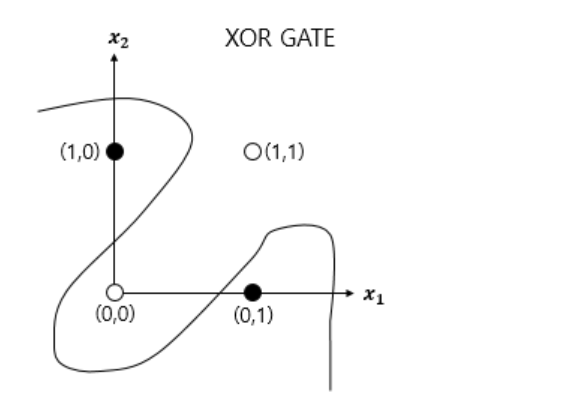

이런 곡선을 만들기 위해선 여러 선형층이 비선형함수(활성화 함수)를 거쳐야 한다. 즉 다층 퍼셉트론(심층 신경망,DNN)을 사용해야 한다.

은닉층이 2개 이상이 되면 심층 신경망이라고 한다



#### 다층 퍼셉트론

In [19]:
import torch
import torch.nn as nn

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [21]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [22]:
model = nn.Sequential( # nn.Sequential -> 여러 층을 캡슐화 한다.
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

이런 신경망을 만든 것이다.

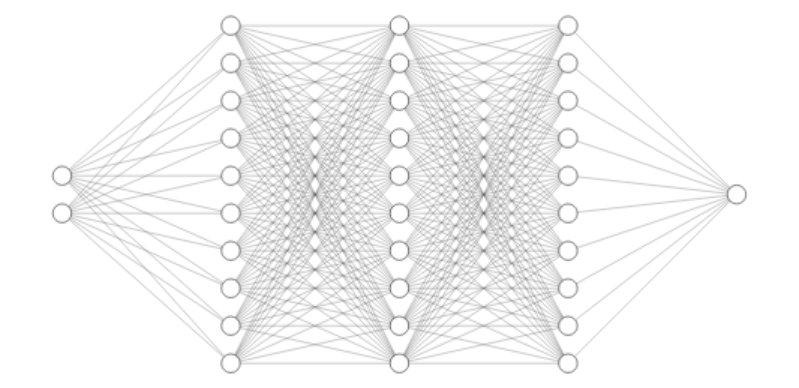

In [23]:
# 비용(손실)함수와 옵티마이저 선언
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

In [24]:
# 반복 훈련
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
100 0.693155825138092
200 0.6931535601615906
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931379437446594
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931197047233582
2000 0.6931172013282776
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084990501404
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930762529373169
3100 0.6930692195892334
3200 0.6930611729621887
3300 0.6930519342422485
3400 0.6930411458015442
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951310157776
3800 0.6929728984832764
3900 0.6929452419281006
4000 0.6929103136062622
4100 0.6928649544715881
4200 

이제는 손실이 감소하는 것을 볼 수 있다. 즉 모델이 정답을 맞추는 정확도가 상승한 것.

이제 실제 예측값을 확인해보자.

In [25]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1168801e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8529482e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


이제 제대로 예측하는 것을 확인할 수 있다.

## 파이토치로 MLP 구현하기

Linear 클래스 두 개로 구성된다. 

Linear 객체는 완전 연결층(fully connected layer) 또는 줄여서 'fc 층'이라 불러서 변수 이름을 'fcn(n=1,2,...)'형태로 지정한다.

층이 순서대로 놓이므로 한 층의 출력 개수는 다음 층의 입력 개수와 같아야 한다. 두 Linear 층 사이에 놓인 비선형 활성화 함수는 필수적이다. 이를 사용하지 않으면 순서대로 놓인 Linear 층 두 개는 Linear 층 하나와 수학적으로 같아서 복잡한 패턴을 모델링할 수 없다.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MultilayerPerceptron(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(MultilayerPerceptron, self).__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x_in, apply_softmax = False):
    intermediate = F.relu(self.fc1(x_in))
    output = self.fc2(intermediate)

    if apply_softmax:
      output = F.softmax(output, dim=1)
    return output

In [ ]:
# MLP 객체 생성

batch_size = 2
input_dim = 3
hidden_dim = 100
output_dim = 4

mlp = MultilayerPerceptron(input_dim, hidden_dim, output_dim)
print(mlp)

MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=4, bias=True)
)


위처럼 print로 층의 유닛(뉴런, 하나의 퍼셉트론) 개수를 확인할 수 있다.

이제 랜덤한 입력값으로 모델을 테스트 해보자. 현재 모델은 훈련하지 않은 상태다. 하지만 이렇게 랜덤한 값으로 모델의 **상태**를 **체크**(sanity check)할 수 있다.

In [ ]:
import torch

def describe(x):
  print("타입: {}".format(x.type()))
  print("크기: {}".format(x.shape))
  print("값: \n{}".format(x))

x_input = torch.rand(batch_size, input_dim)
describe(x_input)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.8438, 0.0379, 0.5742],
        [0.7350, 0.0458, 0.3848]])


In [ ]:
y_output = mlp(x_input, apply_softmax = False)
describe(y_output)

타입: torch.FloatTensor
크기: torch.Size([2, 4])
값: 
tensor([[-0.0497, -0.0865,  0.1506,  0.0272],
        [-0.0458, -0.1149,  0.1190,  0.0167]], grad_fn=<AddmmBackward0>)


위 MLP 모델의 출력은 **2행 4열**의 텐서이다. 

여기서 텐서의 행은 배치 차원에 해당한다. 즉, 미니배치의 **데이터 포인트(샘플)** 개수를 말한다. 

열은 각 데이터 포인트에 대한 최종 **특성 벡터**(표현벡터)이다. 분류에서는 특성 벡터가 **예측 벡터**(prediction vector)이다. 예측 벡터란 확률 분포에 대응한다는 의미이다.

예측 벡터를 확률로 바꾸려면 벡터를 확률로 변환하는 소프트맥스 활성화 함수가 필요하다. 다항 로지스틱 회귀라고도 하고, NLP에서는 최대 엔트로피(maximum entropy) 분류기로 알려졌다. 소프트맥스는 큰 양수값이 높은 확률을 만들고 낮은 음수값은 작은 확률을 만든다. (여러개의 실수값을 확률로 압축)

In [ ]:
y_output = mlp(x_input, apply_softmax=True)
describe(y_output)

타입: torch.FloatTensor
크기: torch.Size([2, 4])
값: 
tensor([[0.2344, 0.2260, 0.2864, 0.2532],
        [0.2394, 0.2234, 0.2823, 0.2549]], grad_fn=<SoftmaxBackward0>)
